#Feature Extraction

In [1]:
!pip install  opencv-contrib-python==3.4.2.17 #to get rid of an error causing from version

In [2]:
#for image operations
import cv2
import numpy as np
#to be able to show images in colab
from google.colab.patches import cv2_imshow
#to calculate the execution time
import datetime
#to get the image from an url
from urllib.request import urlopen

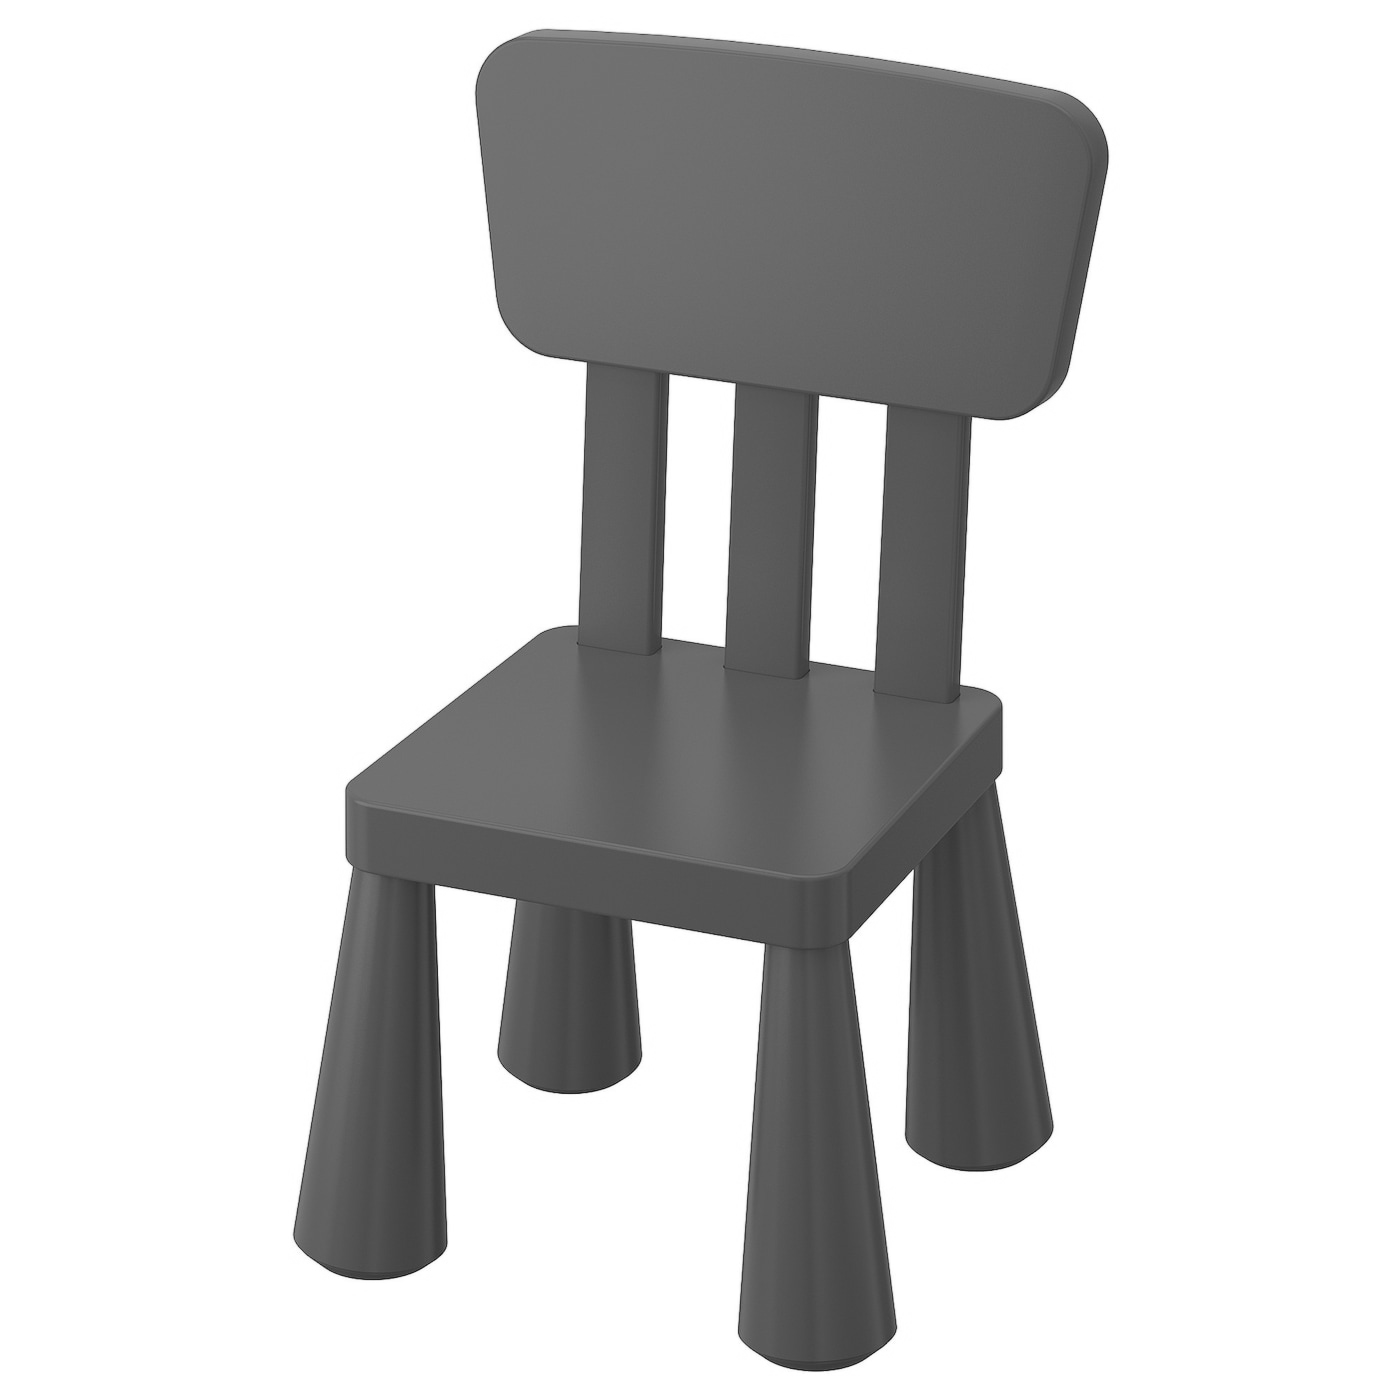

In [3]:
url="https://www.ikea.com/us/en/images/products/mammut-childrens-chair-indoor-outdoor-red__0727924_pe735940_s5.jpg"
request = urlopen(url)
arr = np.asarray(bytearray(request.read()), dtype=np.uint8) #reads the image and turns it into an array
img = cv2.imdecode(arr, -1) #turns the array from memory and converts it into image format in cv2
img=	cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #turning image to grayscale
cv2_imshow(img)

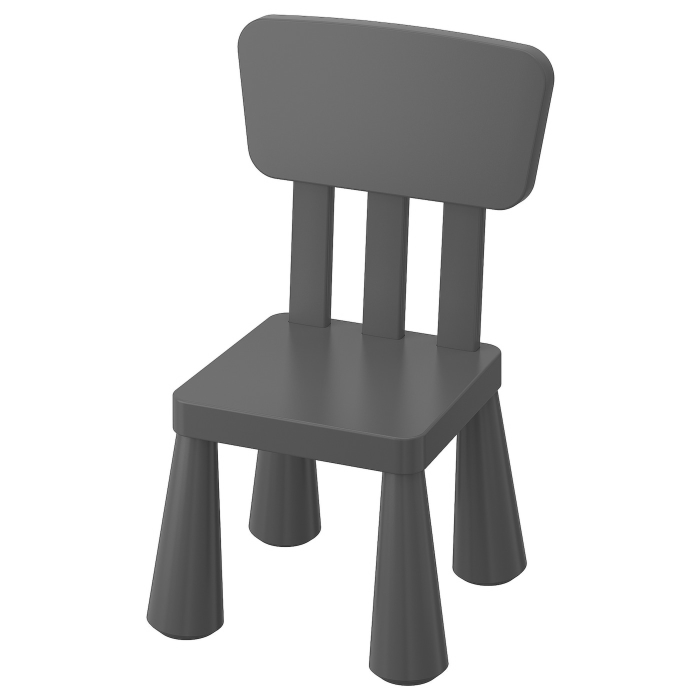

In [4]:
#since the image is big we will resize it
scale_percent = 50 #to scale the width and height
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(img)

##SIFT

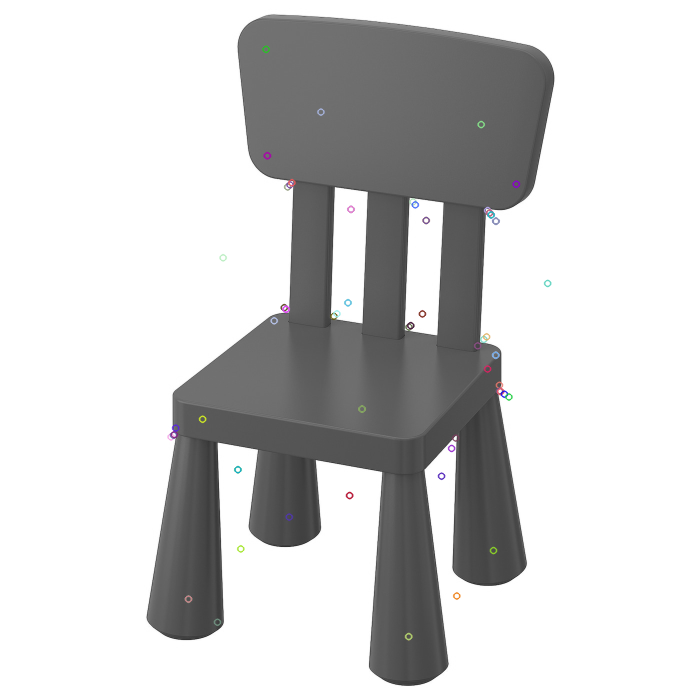

0:00:00.233856


In [5]:
begin1 = datetime.datetime.now() #execution time starts
sift=cv2.xfeatures2d.SIFT_create() 
keypoints_sift,descriptors=sift.detectAndCompute(img,None) 
img_sift=cv2.drawKeypoints(img,keypoints_sift,None)
cv2_imshow(img_sift)
end1= datetime.datetime.now() #execution time ends
print(end1-begin1)

##SURF

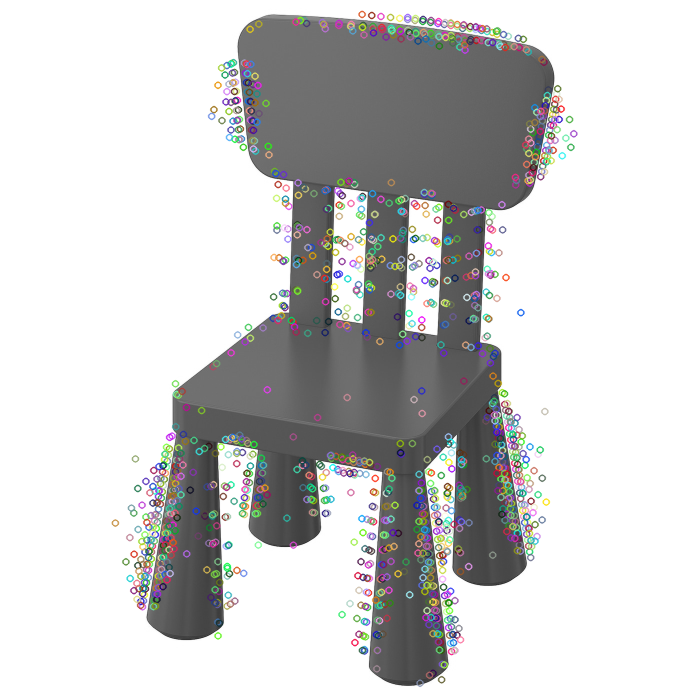

0:00:01.157095


In [6]:
begin2 = datetime.datetime.now() #execution time starts
surf=cv2.xfeatures2d.SURF_create()
keypoints_surf,descriptors=surf.detectAndCompute(img,None)
img_surf=cv2.drawKeypoints(img,keypoints_surf,None)
cv2_imshow(img_surf)
end2= datetime.datetime.now() #execution time ends
print(end2-begin2)

##BRIEF

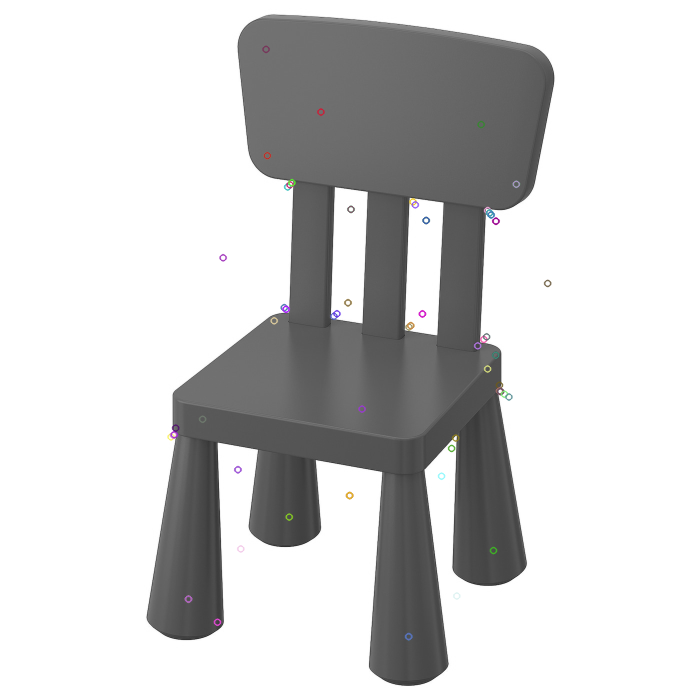

0:00:00.522055


In [7]:
begin3 = datetime.datetime.now() #execution time starts
brief=cv2.xfeatures2d.BriefDescriptorExtractor_create()
keypoints_surf4,descriptors=surf.detectAndCompute(img,None) #since brief is does not find features we used surf 
keypoints_brief,descriptors=brief.compute(img,keypoints_surf4)
img_brief=cv2.drawKeypoints(img,keypoints_sift,None)
cv2_imshow(img_brief)
end3= datetime.datetime.now() #execution time ends
print(end3-begin3)

##ORB

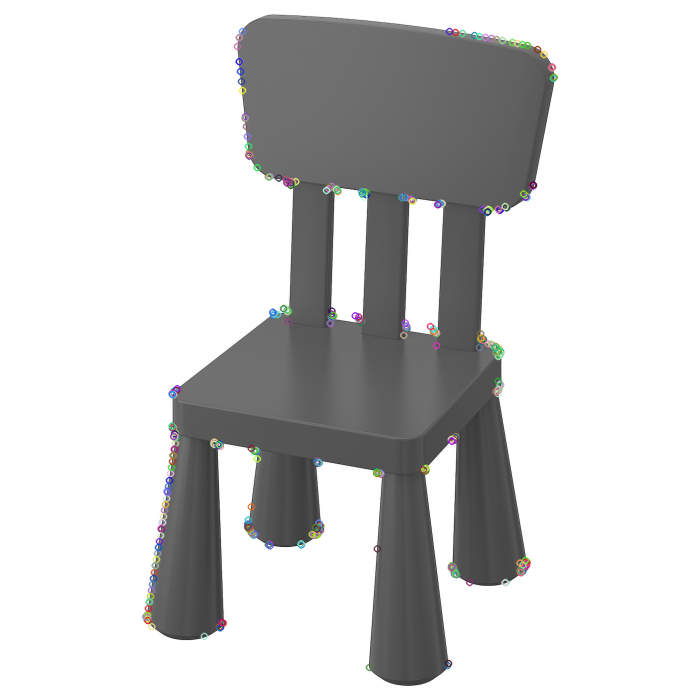

0:00:00.140460


In [8]:
begin4 = datetime.datetime.now()#execution time starts
orb=cv2.ORB_create()
keypoints_orb,descriptors=orb.detectAndCompute(img,None)
img_orb=cv2.drawKeypoints(img,keypoints_orb,None)
cv2_imshow(img_orb)
end4= datetime.datetime.now()#execution time ends
print(end4-begin4)

## Edge Extracting

In [9]:
from skimage.io import imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

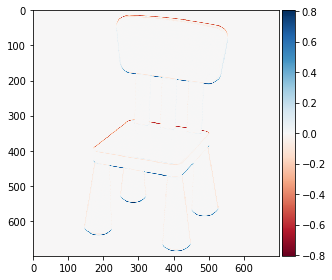

In [10]:
edges_prewitt_horizontal = prewitt_h(img)
edges_prewitt_vertical = prewitt_v(img)
imshow(edges_prewitt_horizontal) #horizontal edges

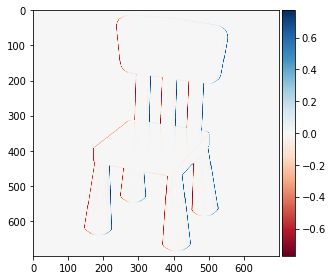

In [11]:
imshow(edges_prewitt_vertical) #vertical edges

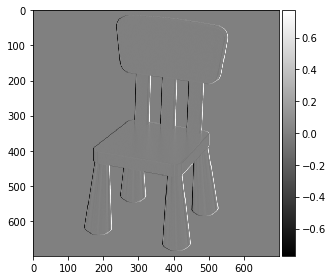

In [13]:
imshow(edges_prewitt_vertical, cmap='gray') #vertical edges in grayscale

#Feature Selection

In [14]:
#dataset arrangements
import pandas as pd
import numpy as np

Dataset link: [Dataset download link](https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set)
Dataset paper: [Dataset paper link](https://dergipark.org.tr/tr/pub/nevsosbilen/issue/46568/549416)

**Features List**
1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence. 

In [15]:
df=pd.read_excel("/content/divorce.xlsx", engine="openpyxl")
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [16]:
df.shape

(170, 55)

In [17]:
df.dtypes

Atr1     int64
Atr2     int64
Atr3     int64
Atr4     int64
Atr5     int64
Atr6     int64
Atr7     int64
Atr8     int64
Atr9     int64
Atr10    int64
Atr11    int64
Atr12    int64
Atr13    int64
Atr14    int64
Atr15    int64
Atr16    int64
Atr17    int64
Atr18    int64
Atr19    int64
Atr20    int64
Atr21    int64
Atr22    int64
Atr23    int64
Atr24    int64
Atr25    int64
Atr26    int64
Atr27    int64
Atr28    int64
Atr29    int64
Atr30    int64
Atr31    int64
Atr32    int64
Atr33    int64
Atr34    int64
Atr35    int64
Atr36    int64
Atr37    int64
Atr38    int64
Atr39    int64
Atr40    int64
Atr41    int64
Atr42    int64
Atr43    int64
Atr44    int64
Atr45    int64
Atr46    int64
Atr47    int64
Atr48    int64
Atr49    int64
Atr50    int64
Atr51    int64
Atr52    int64
Atr53    int64
Atr54    int64
Class    int64
dtype: object

In [18]:
columns=df.columns.values.tolist()
for i in columns:
  print(df[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


##Feature Importance

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [20]:
X=df.iloc[:,0:54] #features
y=df.iloc[:,-1] #target, divorce situation

[0.02505283 0.00276392 0.0045978  0.009744   0.02771852 0.00238614
 0.00122808 0.01992673 0.02218648 0.01724063 0.03662705 0.02935068
 0.0024182  0.01343915 0.00402725 0.05684934 0.05735763 0.06159342
 0.10186642 0.04722376 0.00073007 0.02156159 0.00814642 0.01538544
 0.01977989 0.03363574 0.00995075 0.01779111 0.04714453 0.03438171
 0.00085605 0.01076147 0.02257399 0.00112722 0.00049587 0.02027248
 0.02957392 0.03560098 0.02900798 0.06620695 0.01070315 0.00090772
 0.00069599 0.00834542 0.00030436 0.00080571 0.00080403 0.00035299
 0.00132387 0.00092312 0.0003567  0.00285768 0.00130579 0.00173131]


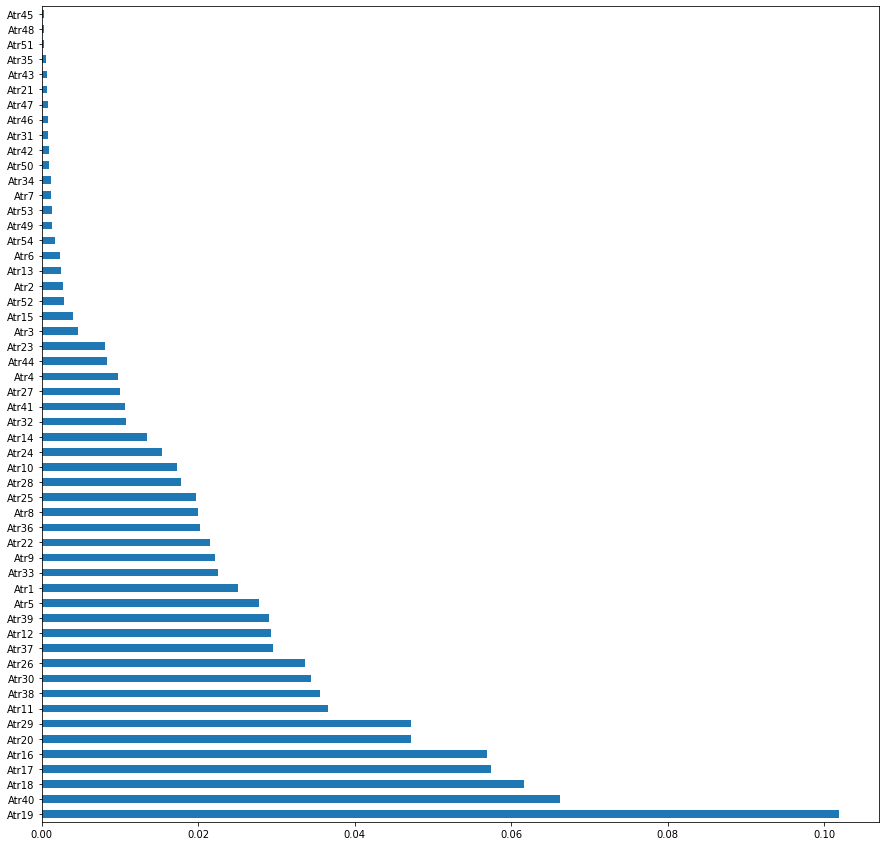

In [21]:
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.sort_values(inplace=True, ascending=False)
feat_importances.plot(kind="barh", figsize=(15,15))
plt.show()

##Correlation Matrix with Heatmap

In [22]:
import seaborn as sns

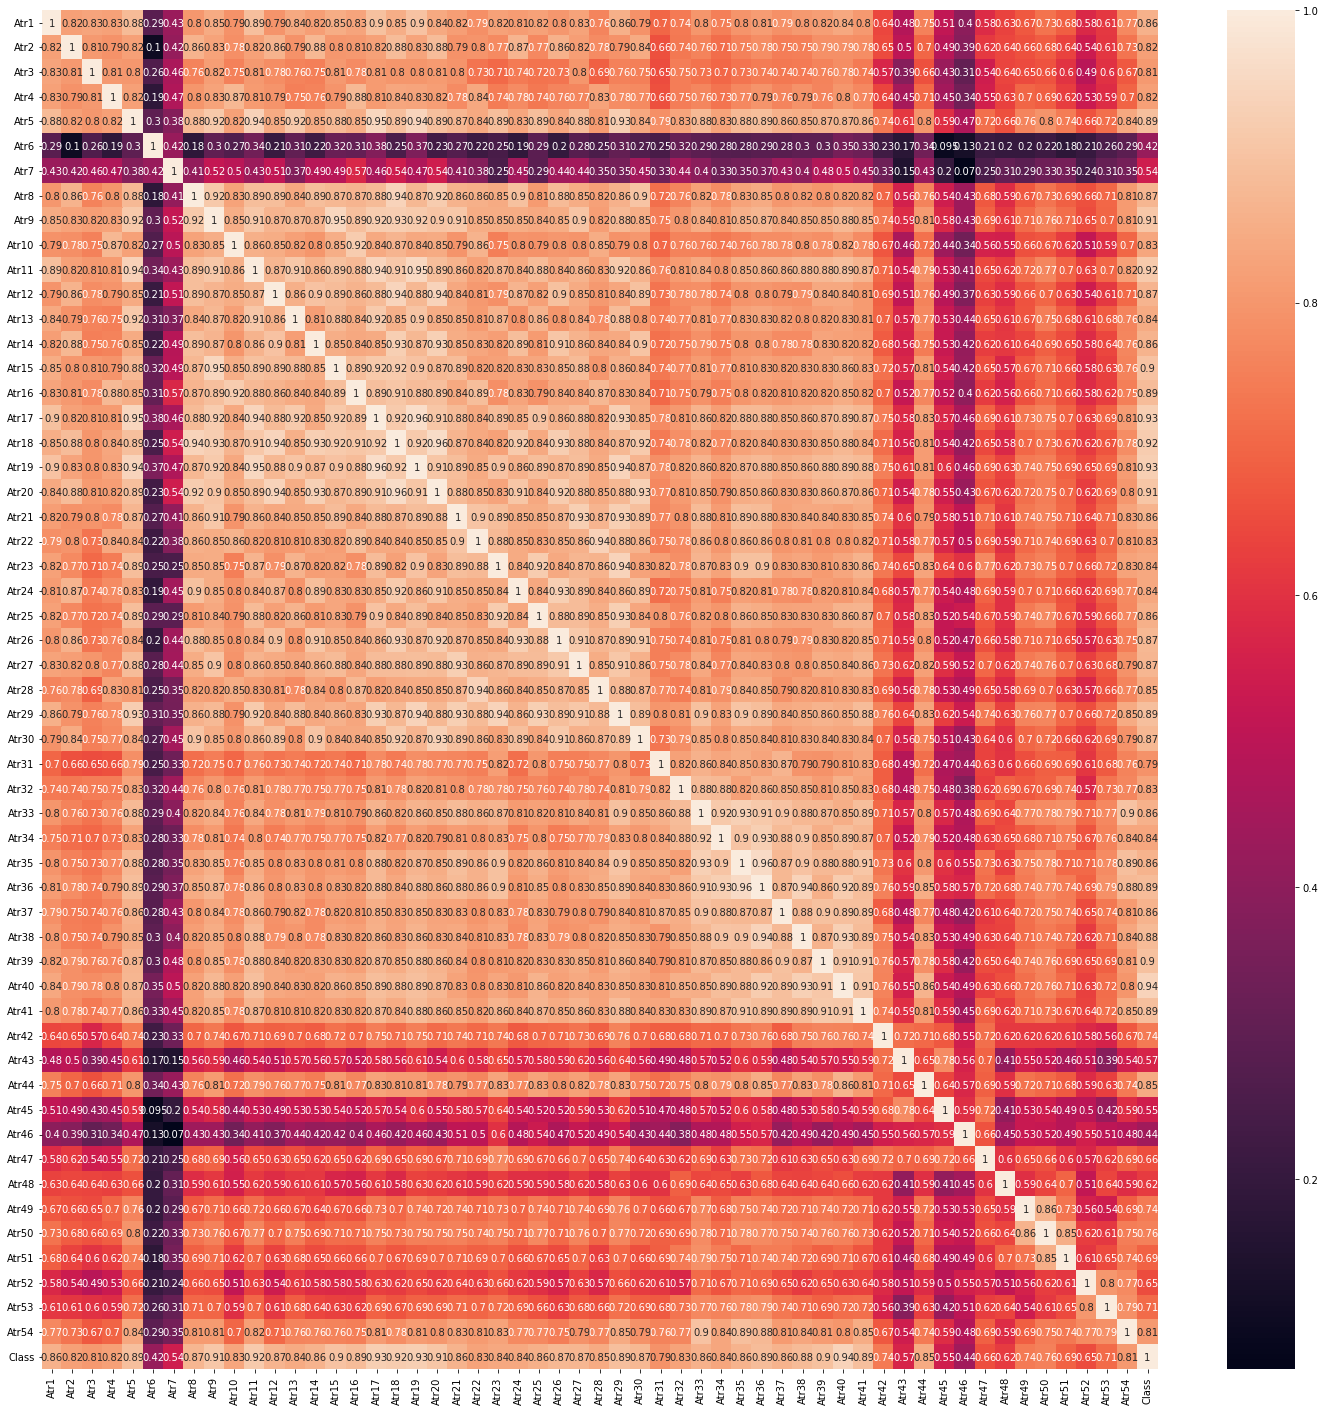

In [23]:
X=df.iloc[:,0:54]
y=df.iloc[:,-1]
corralations=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corralations,annot=True)

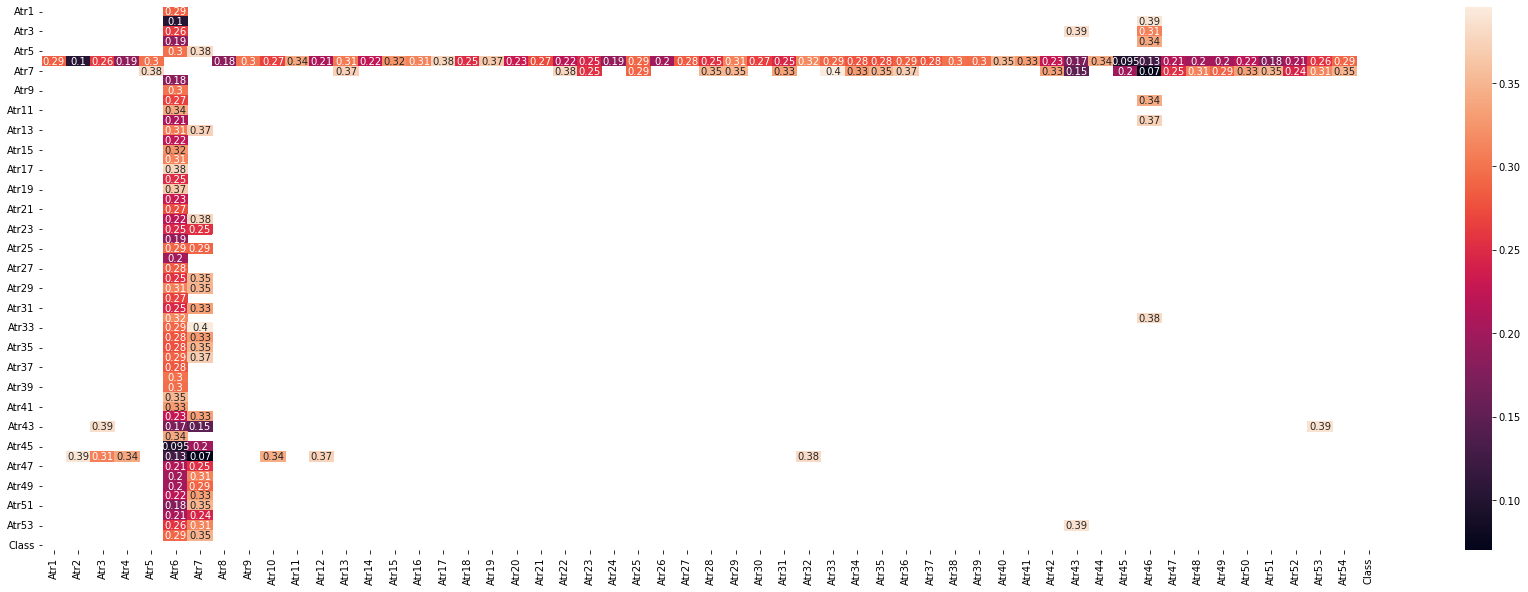

In [25]:
dfCorr = df.corr()
filtered_df = dfCorr[(dfCorr <= 0.4)] #filters the results with less than 0.4 correlation
plt.figure(figsize=(30,10))
sns.heatmap(filtered_df, annot=True)
plt.show()

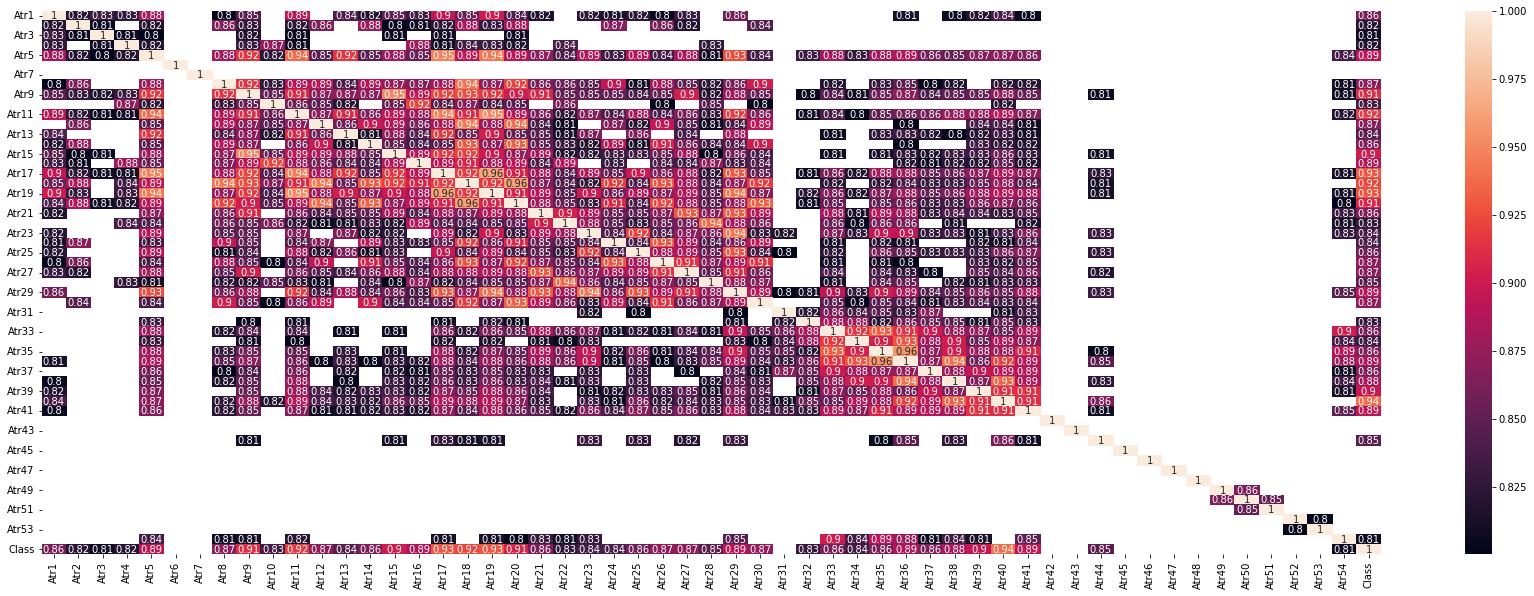

In [26]:
dfCorr = df.corr()
filteredDf = dfCorr[(dfCorr >= 0.8)] #filters the results with more than 0.4 correlation
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True)
plt.show()

##Exhaustive Feature Selection

In [27]:
!pip install --upgrade mlxtend

In [28]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector,SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier

In [29]:
X=df.iloc[:,0:54]
y=df.iloc[:,-1]
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X, y)
vector_names = list(X.columns[selector.get_support(indices=True)])

X_best = X[vector_names]
clf = RandomForestClassifier(n_jobs=-1)

feature_selector = ExhaustiveFeatureSelector(clf,
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=2)

features = feature_selector.fit(X_best, y)
filtered_features= X_best.columns[list(features.best_idx_)]
print(filtered_features)
print(features.best_score_)

Features: 25/25

Index(['Atr9', 'Atr19'], dtype='object')
0.9764705882352942


##LASSO Regularization (L1)

In [30]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,LogisticRegression

In [31]:
columns

['Atr1',
 'Atr2',
 'Atr3',
 'Atr4',
 'Atr5',
 'Atr6',
 'Atr7',
 'Atr8',
 'Atr9',
 'Atr10',
 'Atr11',
 'Atr12',
 'Atr13',
 'Atr14',
 'Atr15',
 'Atr16',
 'Atr17',
 'Atr18',
 'Atr19',
 'Atr20',
 'Atr21',
 'Atr22',
 'Atr23',
 'Atr24',
 'Atr25',
 'Atr26',
 'Atr27',
 'Atr28',
 'Atr29',
 'Atr30',
 'Atr31',
 'Atr32',
 'Atr33',
 'Atr34',
 'Atr35',
 'Atr36',
 'Atr37',
 'Atr38',
 'Atr39',
 'Atr40',
 'Atr41',
 'Atr42',
 'Atr43',
 'Atr44',
 'Atr45',
 'Atr46',
 'Atr47',
 'Atr48',
 'Atr49',
 'Atr50',
 'Atr51',
 'Atr52',
 'Atr53',
 'Atr54',
 'Class']

In [32]:
X=df.iloc[:,0:54]
y=df.iloc[:,-1]
pipeline=Pipeline([("Scaler", StandardScaler()),("model", Lasso())])
search=GridSearchCV(pipeline,{"model__alpha":np.arange(0.1,10,0.1)},cv=2,scoring="neg_mean_squared_error",verbose=3)
search.fit(X,y)
search.best_params_
coefficients=search.best_estimator_.named_steps["model"].coef_
importance=np.abs(coefficients)


Fitting 2 folds for each of 99 candidates, totalling 198 fits
[CV 1/2] END .................model__alpha=0.1;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=0.1;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=0.2;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=0.2;, score=-0.977 total time=   0.0s
[CV 1/2] END .model__alpha=0.30000000000000004;, score=-0.988 total time=   0.0s
[CV 2/2] END .model__alpha=0.30000000000000004;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=0.4;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=0.4;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=0.5;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=0.5;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=0.6;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=0.6;

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 2/2] END .................model__alpha=0.9;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=1.0;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=1.0;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=1.1;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=1.1;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=1.2000000000000002;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=1.2000000000000002;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=1.3000000000000003;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=1.3000000000000003;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=1.4000000000000001;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=1.4000000000000001;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=1.5000000000000002;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 2/2] END ..model__alpha=1.7000000000000002;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=1.8000000000000003;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=1.8000000000000003;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=1.9000000000000001;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=1.9000000000000001;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=2.0;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=2.0;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=2.1;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=2.1;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=2.2;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=2.2;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=2.3000000000000003;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa


[CV 2/2] END .................model__alpha=2.6;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=2.7;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=2.7;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=2.8000000000000003;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=2.8000000000000003;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=2.9000000000000004;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=2.9000000000000004;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=3.0000000000000004;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=3.0000000000000004;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=3.1;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=3.1;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=3.2;, score=-0.988 total time=   0.0s
[CV 2/2] END ..............

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 1/2] END ..model__alpha=3.4000000000000004;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=3.4000000000000004;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=3.5000000000000004;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=3.5000000000000004;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=3.6;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=3.6;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=3.7;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=3.7;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=3.8000000000000003;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=3.8000000000000003;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=3.9000000000000004;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=3.9000000000000004;, score=-0.977 total time=   0.0s
[CV 1/2] END ...............

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 1/2] END .................model__alpha=4.3;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=4.3;, score=-0.977 total time=   0.0s
[CV 1/2] END ..model__alpha=4.3999999999999995;, score=-0.988 total time=   0.0s
[CV 2/2] END ..model__alpha=4.3999999999999995;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=4.5;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=4.5;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=4.6;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=4.6;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=4.7;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=4.7;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=4.8;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=4.8;, score=-0.977 total time=   0.0s
[CV 1/2] END ...............

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 1/2] END .................model__alpha=5.2;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=5.2;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=5.3;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=5.3;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=5.4;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=5.4;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=5.5;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=5.5;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=5.6;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=5.6;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=5.7;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=5.7;, score=-0.977 total time=   0.0s
[CV 1/2] END ...............

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 2/2] END .................model__alpha=6.0;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=6.1;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=6.1;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=6.2;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=6.2;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=6.3;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=6.3;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=6.4;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=6.4;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=6.5;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=6.5;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=6.6;, score=-0.988 total time=   0.0s
[CV 2/2] END ...............

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 2/2] END .................model__alpha=6.9;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=7.0;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=7.0;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=7.1;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=7.1;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=7.2;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=7.2;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=7.3;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=7.3;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=7.4;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=7.4;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=7.5;, score=-0.988 total time=   0.0s
[CV 2/2] END ...............

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 1/2] END .................model__alpha=7.8;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=7.8;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=7.9;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=7.9;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=8.0;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=8.0;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=8.1;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=8.1;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=8.2;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=8.2;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=8.3;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=8.3;, score=-0.977 total time=   0.0s
[CV 1/2] END ...............

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 1/2] END .................model__alpha=8.7;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=8.7;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=8.8;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=8.8;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=8.9;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=8.9;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=9.0;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=9.0;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=9.1;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=9.1;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=9.2;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=9.2;, score=-0.977 total time=   0.0s
[CV 1/2] END ...............

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[CV 1/2] END .................model__alpha=9.6;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=9.6;, score=-0.977 total time=   0.0s
[CV 1/2] END ...model__alpha=9.700000000000001;, score=-0.988 total time=   0.0s
[CV 2/2] END ...model__alpha=9.700000000000001;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=9.8;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=9.8;, score=-0.977 total time=   0.0s
[CV 1/2] END .................model__alpha=9.9;, score=-0.988 total time=   0.0s
[CV 2/2] END .................model__alpha=9.9;, score=-0.977 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [33]:
print(importance)
print("The meaningful features:", np.array(columns[:54])[importance>0])
print("The irrelevant features:", np.array(columns[:54])[importance==0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.01162515 0.         0.         0.
 0.         0.         0.         0.         0.06945976 0.08581092
 0.04742863 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.17996378 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
The meaningful features: ['Atr9' 'Atr17' 'Atr18' 'Atr19' 'Atr40']
The irrelevant features: ['Atr1' 'Atr2' 'Atr3' 'Atr4' 'Atr5' 'Atr6' 'Atr7' 'Atr8' 'Atr10' 'Atr11'
 'Atr12' 'Atr13' 'Atr14' 'Atr15' 'Atr16' 'Atr20' 'Atr21' 'Atr22' 'Atr23'
 'Atr24' 'Atr25' 'Atr26' 'Atr27' 'Atr28' 'Atr29' 'Atr30' 'Atr31' 'Atr32'
 'Atr33' 'Atr34' 'Atr35' 'Atr36' 'Atr37' 'Atr38' 'Atr39' 'Atr41' 'Atr42'
 'Atr43' 'Atr44' 'Atr45' 'Atr46' 'Atr47' 'Atr48' 'Atr49' 'Atr50' 'Atr

##MRMR

In [34]:
!pip install mrmr_selection

In [35]:
from sklearn.datasets import make_classification
from mrmr import mrmr_classif

In [36]:
X=df.iloc[:,0:54]
y=df.iloc[:,-1]
selected_features = mrmr_classif(X=X, y=y, K=10) #top 10 features according to mrmr

100%|██████████| 10/10 [00:00<00:00, 14.12it/s]


In [37]:
selected_features

['Atr40',
 'Atr17',
 'Atr19',
 'Atr18',
 'Atr11',
 'Atr9',
 'Atr20',
 'Atr15',
 'Atr39',
 'Atr41']